In [1]:
import pandas as pd
import numpy
import networkx as nx
import matplotlib.pyplot as plt
import csv
import os
from collections import defaultdict
from tqdm import tqdm
from collections import Counter

In [2]:
# Create dictionary of users and their following list

directory = "/Users/teaganjohnson/Desktop/TwitterNetworkAnalysis/data/"
usernamesDict = defaultdict(list)
dup=0
indicatorUsers = 0
totalLinesOfUsers = 0

with open("/Users/teaganjohnson/Desktop/TwitterNetworkAnalysis/data/data.csv") as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in tqdm(csv_reader):
        if row[0] not in usernamesDict.keys():
            indicatorUsers+=1
            totalLinesOfUsers+=1
            usernamesDict[row[0]] = [row[1]]
        else:
            if row[1] not in usernamesDict[row[0]]:
                totalLinesOfUsers+=1
                usernamesDict[row[0]].append(row[1])
            else:
                dup+=1
    
print("Total num of duplicates: ", dup)
print("Total num of indicators: ", indicatorUsers)
print("Total num of users: ", totalLinesOfUsers)

1215378it [00:16, 75581.71it/s] 

Total num of duplicates:  0
Total num of indicators:  1866
Total num of users:  1215378


In [3]:
# Creates a new file that contains the usernamesDict data
with open("data/data_final.csv", 'a+', newline='') as big_file:
    writer = csv.writer(big_file, delimiter=',', quotechar='"',quoting=csv.QUOTE_MINIMAL)
    for key, value in usernamesDict.items():
        writer.writerow([key, value])
big_file.close()


In [4]:
# Creates a dataframe for the dictionary of users
df = pd.DataFrame(list(usernamesDict.items()), columns = ['user', 'following'])
df.to_csv("/Users/teaganjohnson/Desktop/TwitterNetworkAnalysis/dataframe.csv", index=False)

In [5]:
# Prints dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

                 user                                          following
0       BrahmasmiAham  [ThePushpendra_, Sunil_Deodhar, RakeshSinha01,...
1     biplab2asak6886  [Prasant98036990, Indraji22875267, saffronmano...
2      gosaliya_ashik  [thantmyintu, PaliwalAvi, PiyushGoyalOffc, shu...
3         LostTemple7  [kaykaymenon02, SudhanshuTrived, myogiadityana...
4                vk80  [AmanChopra_, ShaanVP, KamalaHarris, BCCI, nir...
5      PoddarVaishali  [DevinderSolanki, AmanChopra_, AnkitaBnsl, San...
6     joglekarsaurabh  [WittyRighter_29, harishchand314, DeepalTreved...
7     ChamanVarshney1  [IamSuperShivam, praveendharm16, RealHelenAsel...
8          Pallavisms  [n_i_g_a_m, ksinamdar, rishiagraw, s_srivats, ...
9         PrasadKarwa  [IshitaJoshi, LokPoll, Saath_Psych, circleboom...
10      sarkaramartya  [Tahirakhanindia, GSukhpreet, AmanChopra_, Rah...
11     VarierSangitha  [iamkamyabuch, 124Sameert, JanakMalani, JQwt48...
12           balbir59  [sprasadita, Adarsh_S07, Ath

In [6]:
# Creates a network given the usernamesDict
G = nx.Graph()

def createNetwork(bigDict):
    for user, followingList in tqdm(bigDict.items()):
        for following in followingList:
            G.add_edge(user, following)

createNetwork(usernamesDict)

100%|██████████| 1866/1866 [00:03<00:00, 514.85it/s]


In [7]:
G.number_of_nodes()

383192

In [8]:
G.number_of_edges()

1183415

In [9]:
#bCent=nx.betweenness_centrality(G, k=1)

In [10]:
#print(bCent)

In [11]:
# Returns a counter object that shows the users who are most followed
def findMostFollowed(bigDict):
    listOfFollowing = []
    for user, followingList in tqdm(bigDict.items()):
        for following in followingList:
            listOfFollowing.append(following)
    topFollowing = Counter(listOfFollowing)
    return topFollowing

topFollowing = findMostFollowed(usernamesDict)

100%|██████████| 1866/1866 [00:00<00:00, 27138.28it/s]


In [12]:
print(topFollowing.most_common(10))

[('narendramodi', 1421), ('PMOIndia', 1223), ('AmitShah', 1117), ('smritiirani', 1017), ('PiyushGoyal', 973), ('rajnathsingh', 957), ('BJP4India', 953), ('nsitharaman', 930), ('rashtrapatibhvn', 918), ('myogiadityanath', 883)]


In [13]:
d = nx.degree_centrality(G)

In [14]:
print(type(d))
degreeCent = Counter(d)
#print(list(littleThing.items())[0:10])

<class 'dict'>


In [15]:
print(degreeCent.most_common(10))

[('sebastianpinera', 0.037422590822853354), ('binugazi', 0.013050932824622708), ('dkgdelhi', 0.01255770620917506), ('BJPPath', 0.01245853895315913), ('moonriver365', 0.012346323373983208), ('iTrustNaMo_', 0.012341104044719213), ('mayankjain100', 0.012317617063031229), ('tufailelif', 0.012244546453335281), ('prashantktm', 0.012239327124071286), ('harshmadhusudan', 0.012194962825327317)]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

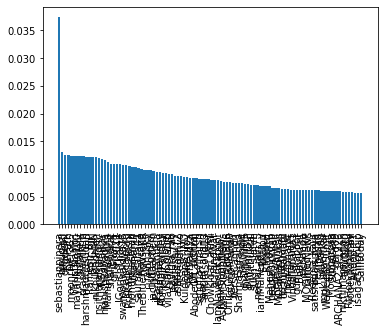

In [16]:
X = plt.bar(dict(degreeCent.most_common(100)).keys(), dict(degreeCent.most_common(100)).values())
plt.xticks(rotation='vertical')

In [17]:
print(len(degreeCent))

383192


In [44]:
def filterDict(uDict, dCent):
    newDict = {}
    for user in uDict.keys():
        if user in dCent.keys():
            newDict[user] = uDict[user]
            
    return newDict

filteredDict = filterDict(usernamesDict, dict(degreeCent.most_common(3)))


In [45]:
H = nx.Graph()

def createNetwork(filteredDict, network):
    for user, followingList in tqdm(filteredDict.items()):
        for following in followingList:
            network.add_edge(user, following)
            
createNetwork(filteredDict, H)

100%|██████████| 3/3 [00:00<00:00, 69.91it/s]


In [46]:
# Creates a new file that contains the filteredDict data
with open("data/topDegreeCentrality.csv", 'a+', newline='') as big_file:
    writer = csv.writer(big_file, delimiter=',', quotechar='"',quoting=csv.QUOTE_MINIMAL)
    for key, value in filteredDict.items():
        for user in value:
            writer.writerow([key, user])
big_file.close()